In [ ]:
!pip install paddlepaddle
!pip install paddleocr

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from google.colab import files

from paddleocr import PaddleOCR

ocr = PaddleOCR(use_angle_cls=True,lang='en')


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:07<00:00, 566kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:09<00:00, 1.13MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:01<00:00, 1.84MiB/s]

[2024/03/27 12:59:47] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

In [ ]:
uploaded = files.upload()

file_name = list(uploaded.keys())[0]

Saving Screenshot 24.png to Screenshot 24.png


In [ ]:
image = cv2.imread(file_name)

In [ ]:
h, w = image.shape[:2]
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Sum white pixels in each row
# Create blank space array and and final image
pixels = np.sum(thresh, axis=1).tolist()
space = np.ones((4, w), dtype=np.uint8) * 255
result = np.zeros((0, w), dtype=np.uint8)

# Iterate through each row and add space if entire row is empty
# otherwise add original section of image to final image
for index, value in enumerate(pixels):
    if value == 0:
        result = np.concatenate((result, space), axis=0)
    row = gray[index:index+1, 0:w]
    result = np.concatenate((result, row), axis=0)


img_read=result

Text(0.5, 1.0, 'Adaptive Threshold')

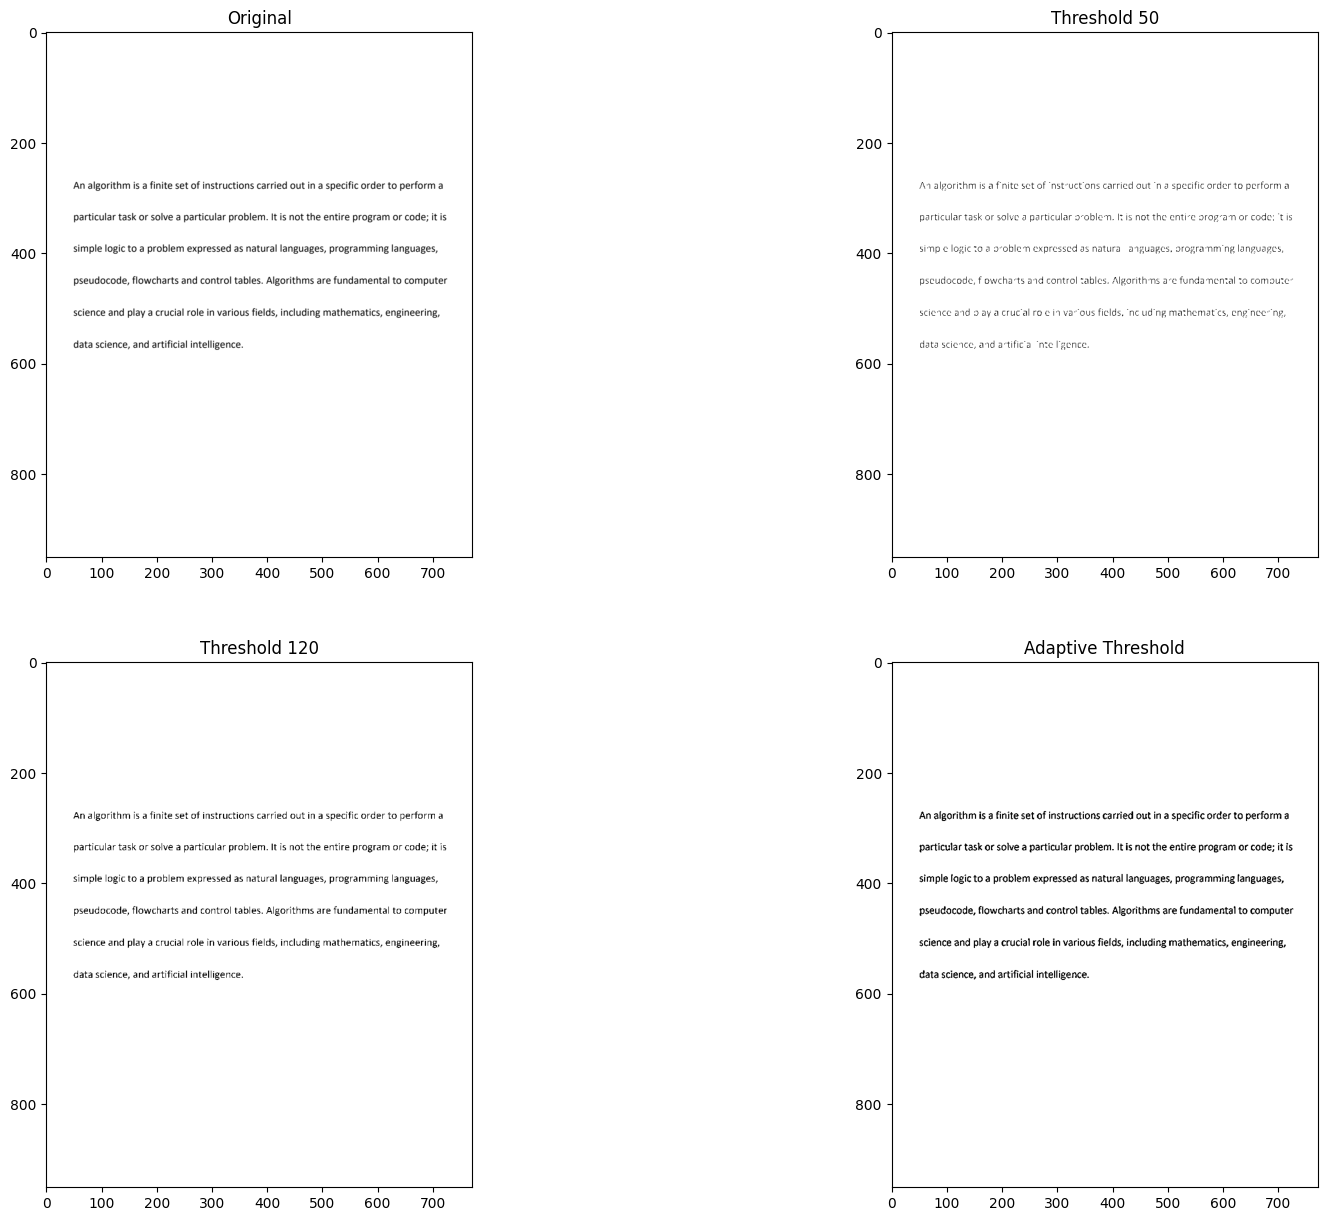

In [ ]:


# global thresholding
retval, img_thresh1=cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)
retval, img_thresh2=cv2.threshold(img_read, 120, 255, cv2.THRESH_BINARY)

# adaptive thresholding
img_thresh_adap=cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,7)

plt.figure(figsize=[20,15])
plt.subplot(221);plt.imshow(img_read, cmap="gray");plt.title("Original")
plt.subplot(222);plt.imshow(img_thresh1, cmap="gray");plt.title("Threshold 50")
plt.subplot(223);plt.imshow(img_thresh2, cmap="gray");plt.title("Threshold 120")
plt.subplot(224);plt.imshow(img_thresh_adap, cmap="gray");plt.title("Adaptive Threshold")

In [ ]:
result1 = ocr.ocr(img_read)
result2 = ocr.ocr(img_thresh1)
result3 = ocr.ocr(img_thresh2)
result4 = ocr.ocr(img_thresh_adap)


[2024/03/27 13:00:08] ppocr DEBUG: dt_boxes num : 6, elapsed : 1.3202273845672607
[2024/03/27 13:00:08] ppocr DEBUG: cls num  : 6, elapsed : 0.12179446220397949
[2024/03/27 13:00:12] ppocr DEBUG: rec_res num  : 6, elapsed : 4.181879997253418
[2024/03/27 13:00:13] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.3536708354949951
[2024/03/27 13:00:13] ppocr DEBUG: cls num  : 6, elapsed : 0.0233612060546875
[2024/03/27 13:00:15] ppocr DEBUG: rec_res num  : 6, elapsed : 1.9259560108184814
[2024/03/27 13:00:15] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.23382067680358887
[2024/03/27 13:00:15] ppocr DEBUG: cls num  : 6, elapsed : 0.01619267463684082
[2024/03/27 13:00:17] ppocr DEBUG: rec_res num  : 6, elapsed : 1.6486918926239014
[2024/03/27 13:00:17] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.23703646659851074
[2024/03/27 13:00:17] ppocr DEBUG: cls num  : 6, elapsed : 0.015159845352172852
[2024/03/27 13:00:19] ppocr DEBUG: rec_res num  : 6, elapsed : 1.6352779865264893


In [ ]:
str1=""
if result1[0] is not None:
  for i in range(len(result1[0])):
    str1=str1+result1[0][i][1][0]+" "
print(str1)

print()
str2=""
if result2[0] is not None:
  for i in range(len(result2[0])):
    str2=str2+result2[0][i][1][0]+" "
print(str2)

print()
str3=""
if result3[0] is not None:
  for i in range(len(result3[0])):
    str3=str3+result3[0][i][1][0]+" "
print(str3)

print()
str4=""
if result4[0] is not None:
  for i in range(len(result4[0])):
    str4=str4+result4[0][i][1][0]+" "
print(str4)

An algorithm is a finite set of instructions carried out in a specific order to perform a particular task or solve a particular problem. It is not the entire program or code; it is simple logic to a problem expressed as natural languages, programming languages, pseudocode, flowcharts and control tables. Algorithms are fundamental to computer science and play a crucial role in various fields, including mathematics, engineering, data science, and artificial intelligence. 

An algorithm is a f'nite set of nstruct'ons carried out 'n a specific order to perform a particular task or solve a particular oroblen. It is not the entire orogram or code: 't is simp e logic to a ooblen expressed as natura anguages.orogranmng languages, data science,and atifica 'nteIgence. 

An algorithm is a finite set of instructions carried out in a specific order to perform a particular task or solve a particular problem. It is not the entire program or code; it is simple logic to a problem expressed as natural l

In [ ]:
!pip install pyspellchecker
!python -m spacy download en_core_web_lg

from textblob import TextBlob
from spellchecker import SpellChecker
import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
def check(res):
  str=re.findall("[a-zA-Z]+",res)
  updated_res=(" ".join(str))
  spell = SpellChecker()
  misspelled = spell.unknown(str)

  if len(updated_res)==0:
    return 100000                           # if len is 0, avoid this case
  return(len(misspelled)/len(updated_res))      # ratio of errors to word

best=""
minm = min(check(str1), check(str2), check(str3), check(str4))

if minm==check(str1):
  best=str1
elif minm==check(str2):
  best=str2
elif minm==check(str3):
  best=str3
else:
  best=str4

print(best)

An algorithm is a finite set of instructions carried out in a specific order to perform a particular task or solve a particular problem. It is not the entire program or code; it is simple logic to a problem expressed as natural languages, programming languages, pseudocode, flowcharts and control tables. Algorithms are fundamental to computer science and play a crucial role in various fields, including mathematics, engineering, data science, and artificial intelligence. 


In [ ]:
def correct(text):
  # txt = TextBlob(text)
  # return txt.correct()
  spell = SpellChecker()
  words = text.split()
  corrected_text = []

  for word in words:
      corrected_word = spell.correction(word)

      if corrected_word is None:
          corrected_word = word

      corrected_text.append(corrected_word)

  corrected_text = " ".join(corrected_text)
  return corrected_text

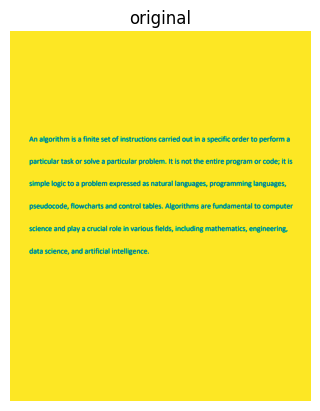

An algorithm is a finite set of instructions carried out in a specific order to perform a particular task or solve a particular problem It is not the entire program or code it is simple logic to a problem expressed as natural languages programming languages pseudocode, flowcharts and control tables Algorithms are fundamental to computer science and play a crucial role in various fields including mathematics engineering data science and artificial intelligence


In [ ]:
plt.imshow(img_read)
plt.title("original")
plt.axis('off')
plt.show()

print(correct(best))